# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = './train.p'

# TODO: Number of testing examples.
n_test = './test.p'

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = ./train.p
Number of testing examples = ./test.p
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

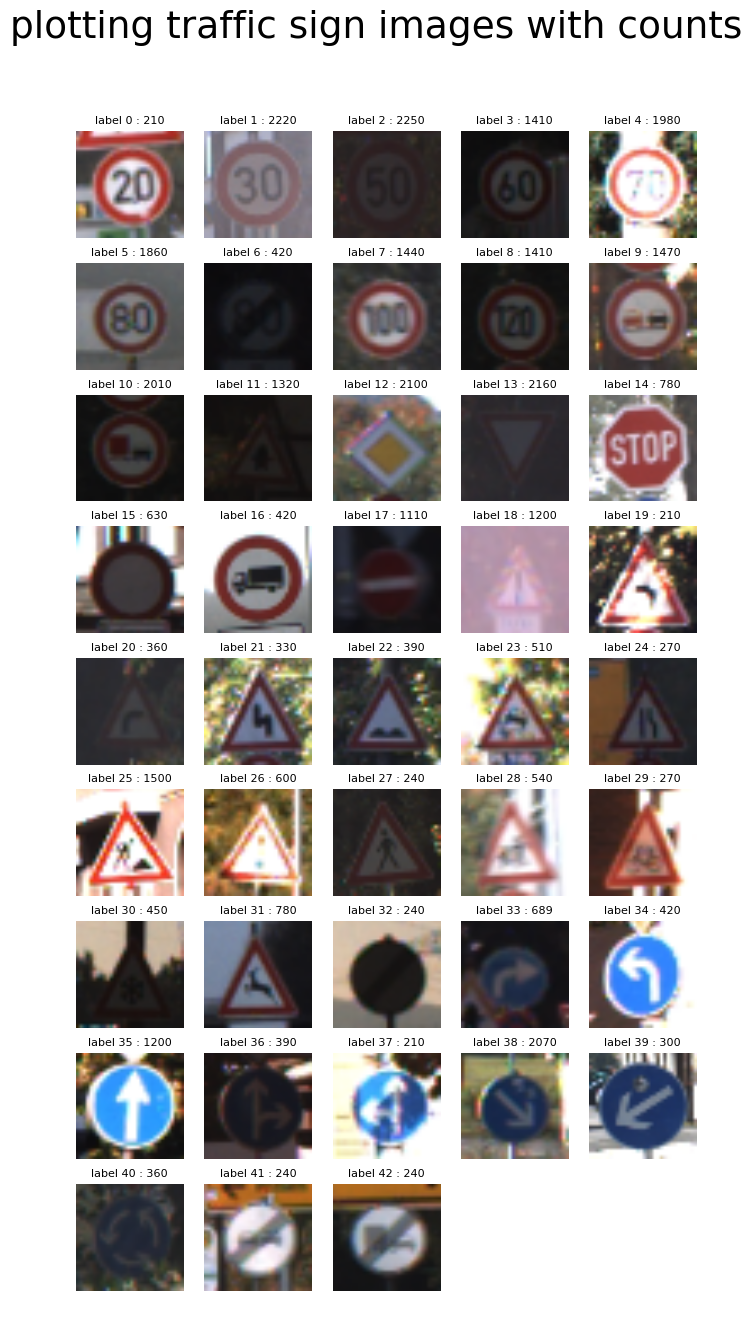

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

fig = plt.figure()
fig, axes = plt.subplots(9, 5, figsize = (8, 15))

for yi in range(9):
    for xi in range(5):
        label_num = 5*yi + xi
        if (label_num) >= n_classes:
            axes[yi,xi].axis('off');
            continue;
        axes[yi, xi].imshow(X_train[y_train == label_num][15]); axes[yi,xi].axis('off');
        axes[yi, xi].set_title('label %d : %d' % (label_num, np.sum(y_train == label_num)), fontsize=8)
        
fig.subplots_adjust(left = None, right = None, top = None, bottom = None, wspace = 0.2, hspace = 0.2)

fig.suptitle("plotting traffic sign images with counts", fontsize=27)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

<body>
<p><br><font size=8>Note</font><br/></p><br/>
<font size=4>
<b>1. Below Graphes indicates "test accuracy"</b><br/>
<b>2. When I compare each parameter like below images,  the basic architecture and hyper parameters are like below</b><br/>
<b>But this is a little defferent from final architecture. Sorry for confusing.</b><br/><br/>
</font>  


<font size="3"><p><b>・multi-scale convolutional network.</b></p></font>

<b>learning rate = 0.0005</b><br/>
<b>batch size : 378</b><br/>
<b>epochs : 200</b><br/>

<p><b>inputs data : [batch, 32, 32, 1]  only Y data</b></p>  
------------------------1st stage-------------------------<br/>
<b>input = inputs data<br/>

conv1 + ReLU : kernel size = 5, layer width = 108<br/>
channel Y connect 108 kernel.<br/>

max pooling : kernel size = 2<br/>
Batch Normalization<br/>
 

output = "conv1"<br/>
------------------------2st stage-------------------------<br/>
input = "conv1"<br/>

conv2 + ReLU : kernel size = 3, layer width = 200<br/>
max pooling : kernel size = 2<br/>
Batch Normalization<br/>

output = "conv2"<br/>
</b>  
------------------------3st stage-------------------------<br/>
<b><font size=3, color='red'>combine "conv1(flatten)" with "conv2(flatten)"**</font><br/>
input = concat "conv1(flatten)" and "conv2(flatten)"<br/>  

fully network + ReLU : layer width = 300<br/>
Batch Normalization<br/>

output = "fc1"<br/>
------------------------4st stage-------------------------<br/>  
input = "fc1"<br/>

out : layer width = 43<br/>
</b>
</body>

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

<b>Answer:</b><br/>
<body><font size=3><b>1 : How I preprocess the data</b></font><br/><br/>

Like this paper : http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf,<br/><br/>

<font size=3><b>RGB to YUV conversion</b><br/></font>
the reason image/video codecs are YUV is so they can reduce the resolution of the U and V channels while keeping Y at full resolution, because luminance is more important than color.<br/>   
But, I don't think YUV by itself would be a big advantage over RGB.<br/><br/>

And, If you can reduce the resolution of U and V in a way that's compatible with convolutional nets, your net should be half the size and therefore twice as fast, without much loss of accuracy.<br/><br/>

However, blow image shows that "Y" and "Y_100, UV_8" are better than RGB datasets.<br/>
So I choose YUV conversion<br/><br/>
・<b>"Y_100, UV_8"</b> means Y channle connect 100 kernel and UV channle connect 8 kernel.<br/><br/>

<font size=3><b>data scale [0, 1]</b> :  X_train / 255<br/></font>
This is for activate function.<br/>
</body>

<body><img src="./images/P.png", width=500, height=500/></body>

In [1]:
import tensorflow as tf
import pickle
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

In [4]:
def RGB_to_YUV(images):
    """Image color space conversion from RGB to YUV

        Args:
            images (numpy array): 3 or 4 dimension. RGB Image
                                  4 dimension is (batch size, image shape)
        Returns
            images (numpy array): 3 or 4 dimension. YUV Image
    """
    if images.ndim == 4:
        for xi in range(images.shape[0]):
            images[xi] =  cv2.cvtColor(images[xi], cv2.COLOR_RGB2YUV)
        return images
    else:
        images = cv2.cvtColor(images, cv2.COLOR_RGB2YUV)
        return images

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**  

<body><font size=3><b>1 : how to prepare and divide into training, validation sets</b></font></body>

Like this paper : http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf,  

The dataset "GTSRB" were extracted from 1-second video sequences which each track has 30 samples. in other words, Every 30 images is from a single sign traffic.     
  
So, I ensure the validation set would have at least one image per traffic sign, per 30 images.

So I separate each track to two segments.  
One is training sets that have about 27 or 28 images per track.    
The other is validation sets that have 2 or 3 images per track

That means one of the images in X_train[:30] will go into validation set, as well as one image from X_train[30:60]  
<br>
<body><b><font size=3>2 : How did you generate the data?</font></b></body>

I tried to generate additional data by "blur original images".  
Generally, by building a jittered dataset, the models would probably increase robustness.

But there is no differences between original datasets and new datasets in terms of accuracy(test).  
So I don't add new data to original datasets, and I use original datasets.  

**Below image is comparison with "New Datasets" and "Original Datasets"**  
"378" and "776" means Batch Size

<body><img src="./images/GD.png", width=500, height=500/></body>

In [5]:
### Generate data additional data
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
def shuffle_datasets(x, y):
    """shuffle datasets"""
    np.random.seed(832289)
    argnum = np.arange(y.shape[0])
    np.random.shuffle(argnum)
    x = x[argnum]
    y = y[argnum]
    return x, y

def divide_training_and_validataion(original_X_train, original_y_train, n_classes, test_size=0.08):
    """divide training sets into training and validation sets.
       Training Sets has same portion(0.92) of each category.
       Validation Sets has same portion(0.08)

       Args:
           original_X_train (numpy array): 4 dimension Datasets for Training(image)
           original_y_train (numpy array): 1-dimension Datasets for Training(category)
           n_classes (int): number of categories

       Returns
           X_train (numpy array): 4 dimension Training Sets(image)
           X_valid (numpy array): 4 dimension Validation Sets(image)
           y_train (numpy array): 1 dimension Training Sets(category)
           y_valid (numpy array): 1 dimension Validation Sets(category)
    """
    X_train = np.array([]); X_valid = np.array([])
    y_train = np.array([]); y_valid = np.array([])

    sum_of_each_categories = 0
    for nc in range(n_classes):
        sum_of_each_categories += np.sum(original_y_train == nc)
        x = original_X_train[sum_of_each_categories : sum_of_each_categories + sum_of_each_categories]
        y = original_y_train[sum_of_each_categories : sum_of_each_categories + sum_of_each_categories]
        train_feature, valid_feature, train_label, valid_label = train_test_split(
            x,
            y,
            test_size=test_size,
            random_state=3
        )
        if nc == 0:
            X_train = train_feature; X_valid = valid_feature
            y_train = train_label;   y_valid = valid_label
        else:
            X_train = np.concatenate([X_train, train_feature], axis=0)
            X_valid = np.concatenate([X_valid, valid_feature], axis=0)
            y_train = np.concatenate([y_train, train_label], axis=0)
            y_valid = np.concatenate([y_valid, valid_label], axis=0)

    return X_train, X_valid, y_train, y_valid

def to_onehot_vector(y_values, n_classes):
    """convert to one hot vector"""
    onehot_y = np.zeros((y_values.shape[0], n_classes))
    onehot_y[np.arange(y_values.shape[0]), y_values] = 1
    return onehot_y

def main():
    training_file = './train.p'
    test_file = './test.p'

    with open(training_file, mode='rb') as f:
        train = pickle.load(f)

    with open(test_file, mode='rb') as f:
        test = pickle.load(f)

    X_train, y_train = train['features'], train['labels']
    X_test, y_test = test['features'], test['labels']

    X_train = RGB_to_YUV(X_train)
    X_test = RGB_to_YUV(X_test)

    n_classes = len(set(y_train))

    X_train, X_valid, y_train, y_valid = divide_training_and_validataion(X_train, y_train, n_classes)

    X_train = X_train / 255
    X_valid = X_valid / 255
    X_test = X_test / 255

    X_train, y_train = shuffle_datasets(X_train, y_train)
    X_valid, y_valid = shuffle_datasets(X_valid, y_valid)

    Y_train = to_onehot_vector(y_train, n_classes)
    Y_valid = to_onehot_vector(y_valid, n_classes)
    Y_test = to_onehot_vector(y_test, n_classes)

    training_epochs = 200
    valid_accuracy_list, test_accuracy_list = train_validation_test(X_train, Y_train, X_valid, Y_valid, X_test, Y_test, training_epochs=training_epochs, batch_size=378)

    plt.plot(np.arange(0,training_epochs), test_accuracy_list, 'b', label="test accuracy")
    plt.plot(np.arange(0,training_epochs), valid_accuracy_list, 'r', label="valid accuracy")
    plt.legend(loc='best')
    plt.yticks(np.arange(0.00, 1.05, 0.05))
    plt.xlabel("epoch");plt.ylabel("accuracy")
    plt.title("model.py"); plt.savefig("model.png", dpi=150)
    np.savez('model.npz', valid=valid_accuracy_list, test=test_accuracy_list)
    plt.show()

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**  
<body><font size="3"><b>I made a multi-scale convolutional network.</b></font><br/></body>

**inputs data : [batch, 32, 32, 3]  YUV data  **  
------------------------1st stage-------------------------  
input = inputs data  

**conv1 + ReLU : kernel size = 5, layer width = 108**  
channel Y connect 100 kernel.  
channnel UV connect 8 kernel.  

**max pooling : kernel size = 2**   
**Batch Normalization**  
 

output = "conv1"  
------------------------2st stage-------------------------  
input = "conv1"  

**conv2 + ReLU : kernel size = 3, layer width = 200**  
**max pooling : kernel size = 2**    
**Batch Normalization**  

output = "conv2"  

<body>
------------------------3st stage-------------------------<br/>
<font size=3, color='red'><b>combine "conv1(flatten)" with "conv2(flatten)"</b></font><br/></body>
input = concat "conv1(flatten)" and "conv2(flatten)"  

**fully network + ReLU : layer width = 300**  
**Batch Normalization**  

output = "fc1"  
------------------------4st stage-------------------------  
input = "fc1  

**out : layer width = 43**  


<body><br/><br/>
<font size=3, color='red'><b>・About below images</b></font><br/>
<b>"BP" means the flow of layer "conv -> Batch Normalization -> Max Pooling"</b><br/>
<b>"PB" means the flow of layer "conv -> Max Pooling -> Batch Normalization"</b><br/><br/>

<b>"No Fully Layer" means there is no fully layer. In other words, This network don't have 3st stage</b><br/>
<b>"One Fully Layer" means this architecrue is same to final architecture.</b><br/>
<b>"Two Fully Layer" means add Fully layer2 to final architecture. layer width = 100</b>
</body>

<body><img src="./images/fig2.png", width=1400, height=1400/></body>

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def build_graph(is_training):
    """define model architecture, loss function, optimizer"""
    def conv2d(x, W, b, stride=1):
        """define convolution layer"""
        x = tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='SAME')
        x = tf.nn.bias_add(x, b)
        return tf.nn.relu(x)

    def maxpool2d(x, k=2):
        """define max pooling layer"""
        return tf.nn.max_pool(
            x,
            ksize = [1, k, k, 1],
            strides = [1, k, k, 1],
            padding='SAME')

    def batch_norm(inputs, is_training, decay=0.9, eps=1e-5):
        """Batch Normalization

           Args:
               inputs: input data(Batch size) from last layer
               is_training: when you test, please set is_training "None"
           Returns:
               output for next layer
        """
        gamma = tf.Variable(tf.ones(inputs.get_shape()[1:]), name="gamma")
        beta = tf.Variable(tf.zeros(inputs.get_shape()[1:]), name="beta")
        pop_mean = tf.Variable(tf.zeros(inputs.get_shape()[1:]), trainable=False, name="pop_mean")
        pop_var = tf.Variable(tf.ones(inputs.get_shape()[1:]), trainable=False, name="pop_var")

        if is_training != None:
            batch_mean, batch_var = tf.nn.moments(inputs, [0])
            train_mean = tf.assign(pop_mean, pop_mean * decay + batch_mean*(1 - decay))
            train_var = tf.assign(pop_var, pop_var * decay + batch_var * (1 - decay))
            with tf.control_dependencies([train_mean, train_var]):
                return tf.nn.batch_normalization(inputs, batch_mean, batch_var, beta, gamma, eps)
        else:
            return tf.nn.batch_normalization(inputs, pop_mean, pop_var, beta, gamma, eps)

    def create_model(x, weights, biases, is_training):
        """define model architecture"""
        conv1_1 = conv2d(tf.expand_dims(x[:, :, :, 0], 3), weights['layer_1_1'], biases['layer_1_1'])
        conv1_2 = conv2d(x[:, :, :, 1:], weights['layer_1_2'], biases['layer_1_2'])
        conv1 = tf.concat(3, [conv1_1, conv1_2])
        conv1 = maxpool2d(conv1, 2)
        conv1 = batch_norm(conv1, is_training)

        conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
        conv2 = maxpool2d(conv2, 2)
        conv2 = batch_norm(conv2, is_training)

        layer_3_1 = tf.reshape(
            conv2,
            [-1, 8*8*200]
        )
        layer_3_2 = tf.reshape(
            conv1,
            [-1, 16*16*108]
        )
        fc1 = tf.concat(1, [layer_3_1, layer_3_2])

        fully = tf.add(tf.matmul(fc1, weights['fully']), biases['fully'])
        fully = tf.nn.relu(fully)
        fully = batch_norm(fully, is_training)
        out = tf.add(tf.matmul(fully, weights['out']), biases['out'])
        return out

    layer_width = {
        'layer_1_1' : 100,
        'layer_1_2' : 8,
        'layer_2' : 200,
        'fully' : 300,
        'out' : 43
    }

    #weight =  [filter_width, filter_height, in_channels, out_channel]
    weights = {
        'layer_1_1' : tf.Variable(
            tf.truncated_normal([5, 5, 1, layer_width['layer_1_1']],
                stddev=0.01, seed=832289), name="w_layer_1_1"),
        'layer_1_2' : tf.Variable(
            tf.truncated_normal([5, 5, 2, layer_width['layer_1_2']],
                stddev=0.01, seed=832289), name="w_layer_1_2"),
        'layer_2' : tf.Variable(
            tf.truncated_normal([3, 3, layer_width['layer_1_1']+layer_width['layer_1_2'],
                layer_width['layer_2']], stddev=0.01, seed=832289), name="w_layer_2"),
        'fully' : tf.Variable(
            tf.truncated_normal([8 * 8 * layer_width['layer_2'] + 16*16*108, layer_width['fully']],
                stddev=0.01, seed=832289), name="w_fully"),
        'out' : tf.Variable(
            tf.truncated_normal([layer_width['fully'], layer_width['out']],
                stddev=0.01, seed=832289), name="w_out")
    }

    biases = {
        'layer_1_1' : tf.Variable(tf.zeros(layer_width['layer_1_1']), name="b_layer_1_1"),
        'layer_1_2' : tf.Variable(tf.zeros(layer_width['layer_1_2']), name="b_layer_1_2"),
        'layer_2' : tf.Variable(tf.zeros(layer_width['layer_2']), name="b_layer_2"),
        'fully' : tf.Variable(tf.zeros(layer_width['fully']), name="b_fully"),
        'out' : tf.Variable(tf.zeros(layer_width['out']), name="b_out")
    }


    x = tf.placeholder("float", [None, 32, 32, 3])
    y = tf.placeholder("float", [None, 43])
    phase_train = tf.placeholder(tf.bool, name='phase_train') if is_training else None

    classifier = create_model(x, weights, biases, phase_train)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(classifier, y))
    opt = tf.train.AdamOptimizer(0.0005)
    optimizer = opt.minimize(cost)
    correct_prediction = tf.equal(tf.argmax(classifier, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    return x, phase_train, y, optimizer, cost, accuracy

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**  
**Type of optimizer : Adam **   
Adam itself does a learning rate decay, so I don't use learning decay.

**learning rate = 0.0005**  
**batch size : 378**  
**epochs : 200**  

<body><img src="./images/fig.png", width=1000, height=1000/></body>

In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.

def get_accuracy(x, y, phase_train, X_test, Y_test, accuracy, test_batch_size=30):
    """Get accuracy of selected datasets"""
    num_iter = X_test.shape[0] // test_batch_size
    num_accuracy= 0
    for ni in range(num_iter):
        num_accuracy += accuracy.eval({x : X_test[test_batch_size*ni : test_batch_size*(ni+1)],
                            y : Y_test[test_batch_size*ni : test_batch_size*(ni+1)], phase_train: None})
    num_accuracy = num_accuracy / num_iter
    return num_accuracy

def train_validation_test(X_train, Y_train, X_valid, Y_valid, X_test, Y_test, training_epochs=200, batch_size=378):
    """Excecute Training, Validation, Test

       Returns:
           valid_accuracy_list (list): accuracy of Validation sets of each epoch
           test_accuracy_list (list): accuracy of Test sets of each epoch
    """
    batch_size = batch_size
    training_epochs = training_epochs

    test_accuracy_list = []
    valid_accuracy_list = []
    x, phase_train, y, optimizer, cost, accuracy =  build_graph(is_training=True)
    saver = tf.train.Saver()

    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())

        for epoch in range(training_epochs):
            sum_cost = 0
            total_batch = len(X_train)//batch_size
            for i in range(total_batch):
                batch_x, batch_y = X_train[i*batch_size : (i+1) * batch_size], Y_train[i*batch_size : (i+1) * batch_size]
                sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, phase_train: True})
                sum_cost += sess.run(cost, feed_dict={x: X_train, y: Y_train})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(sum_cost))

            valid_accuracy = get_accuracy(x, y, phase_train, X_valid, Y_valid, accuracy, test_batch_size=30)
            valid_accuracy_list.append(valid_accuracy)
            print(
                "valid Accuracy:",
                valid_accuracy
            )

            test_accuracy = get_accuracy(x, y, phase_train, X_test, Y_test, accuracy, test_batch_size=30)
            test_accuracy_list.append(test_accuracy)
            print(
                "test Accuracy:",
                test_accuracy
            )
        print("Optimization Finished!")
        saver.save(sess, "model.ckpt")

    return valid_accuracy_list, test_accuracy_list

<body><font size="5", color="red"><b>NOTE</b></font><br/></body>
<b>In my local environment(CPU Only), I don't execute my training program because it was very very slow.</b><br/>
<b>If you want execute training, please check ./finish_train_valid_378_00005.py.</b><br/>
<b>And, In GPU environment, command "python3 finish_train_valid_378_00005.py"</b>
</body>


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**  
First, I imitate this paper. http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf  

And compare simple convolutional network with Multi-scale convolutional network.  
Then Multi-scale is far superior to Simple.  
So I decided to examine multi-scale convolutional network mainly.   

I think the reason multi-scale is better than Simple is that combining multiple stages provides different scales of receptive fields to the classifier.   
The 2st stage extracts “global” and invariant shapes and structures, while the 1st stage extracts “local” motifs with more precise details.  

After deciding basic architecture, I compare below elements.  
・ Conv+ReLU -> Batch Normalization -> Max Pooling   or   **Conv+ReLU -> Max Pooling -> Batch Normalization**  
・ Num of Fully Layer : 0, **1**, 2  
・ Depth of Layer 2 : 108 or **200**  
・ Learning Rate  0.001, **0.0005**, 0.0001  
・ Batch Size : **378**, 776  
・ Preprocessing : RGB, **YUV**, Y  


**About Num of Fully Layer**  
Preparing One Fully Layer is better than others.  
I think The reason not preparing Fully Layer was bad　is that it doesn't have power of representation.  
I think The reason  preparing Two Fully Layer was bad　is that Over-Fitting occured because it had many parameters.  

**About Learning Rate**  
Learning Rate **0.0005** and 0.0001  far better than 0.001  
When using 0.001, The model would not be convergence because the learning rate 0.001 is big.  

<body><img src="./images/fig3.png"/></body>

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [3]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
import numpy as np
from scipy import misc
import cv2

def test1(test_features):
    # tf Graph input
    batch_size = 378
    training_epochs = 1

    test_accuracy_list = []
    x, phase_train,predictions =  build_graph(is_training=True)
    saver = tf.train.Saver()
    new_saver = tf.train.import_meta_graph("model.ckpt.meta")
    last_model = tf.train.latest_checkpoint('./')
    print(last_model)
    with tf.Session() as sess:
        saver.restore(sess, last_model)
        probabilities = sess.run(predictions, feed_dict={x: test_features,phase_train: None})
        top_k = sess.run(tf.nn.top_k(probabilities, 5, sorted=True))
        print("Predicted Labels")
        print(top_k)
        print(np.argmax(probabilities, 1))
        np.savez("top_k.npz", top = top_k, predict_answer = np.argmax(probabilities, 1))
        
        
def main():    
    test_images = np.uint8(np.zeros((5,32,32,3)))

    for i in range(5):
        ifile = 'test{}.png'.format(i+1)
        im = misc.imread(ifile)[:, :, :3]
        im = misc.imresize(im, (32, 32))
        test_images[i] = im
       
    test_images = test_images.astype(np.float32)
    
    for i in range(5):
        test_images[i] = (test_images[i]  - test_images[i].min()) *  (255.0 / (test_images[i].max() - test_images[i].min()))

    yuv_train_features = np.copy(test_images)
    test_images = RGB_to_YUV(yuv_train_features, test_images)
    test_images = test_images.astype(np.float32)
    test1(test_images/255.0)

<body><font size="5", color="red"><b>NOTE</b></font><br/></body>
<b>In my local environment(CPU Only), I can't reuse parameter because of some error.</b><br/>
<b>So I take a picture of the result of top_k in remote environment(GPU)</b><br/>
<b>I think The cause of error is for differences between GPU and CPU.  </b>
</body>

<body><img src="./images/top_k.png", width=700, height=700/></body>

In [32]:
probability = np.load("top_k.npz")
predict_answer = probability['predict_answer']
correct_labels = [14, 2, 3, 3, 14]
print("correct labels : ",correct_labels)
print("predicted answer : ", predict_answer)

correct labels :  [14, 2, 3, 3, 14]
predicted answer :  [14 40  9 19 14]


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**  

・ Image 0 : This sign is blurred  
・ Image 1 : This sign is blurred and view from an oblique  
・ Image 2 : This sign is blurred and a red color is pale  
・ Image 3 : This sign is blurred and a little rotated  
・ Image 4 : This sign is blurred and the edge's color is red  

There are also color corrections/ white balance /contract that affect the result.

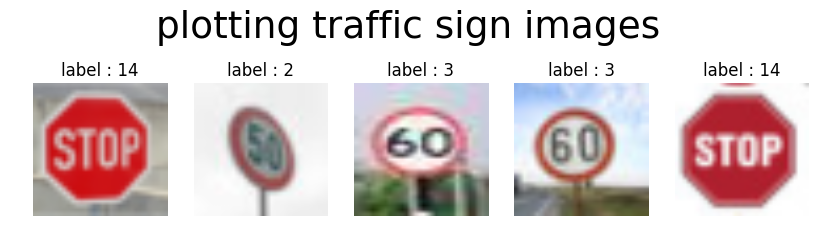

In [26]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from PIL import Image
from scipy import misc

test_images = np.uint8(np.zeros((5,32,32,3)))
%matplotlib inline

fig = plt.figure()
fig, axes = plt.subplots(1, 5, figsize = (10, 3))
    
for i in range(5):
    ifile = 'test{}.png'.format(i+1)
    im = misc.imread(ifile)[:, :, :3]
    im = misc.imresize(im, (32, 32))
    test_images[i] = im

for x in range(5):
    axes[x].imshow(test_images[x]); axes[x].axis('off');
    
axes[0].set_title("label : 14")
axes[1].set_title("label : 2")
axes[2].set_title("label : 3")
axes[3].set_title("label : 3")
axes[4].set_title("label : 14")

fig.subplots_adjust(left = None, right = None, top = None, bottom = None, wspace = 0.2, hspace = 0.2)

fig.suptitle("plotting traffic sign images", fontsize=27)
plt.show()

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**  

correct labels = [14, 2, 3, 3, 14].  
predicted answer  = [14 40  9 19 14]  
So it's 40% accuracy.  

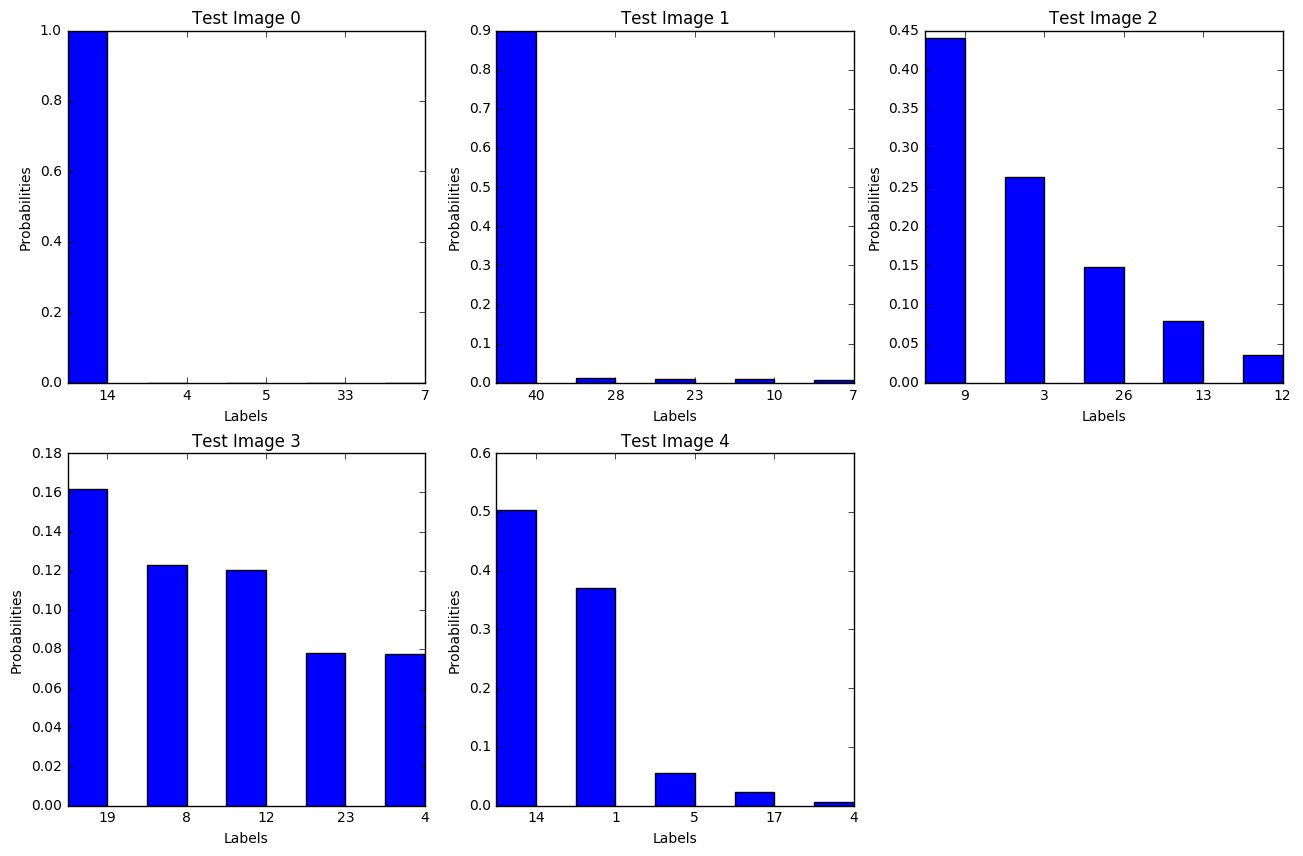

In [81]:
top_k = probability['top']
index = np.arange(5)  # the x locations for the values
width = 0.5              # the width of the bars
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.subplots_adjust(left = None, right = 0.8, top = None, bottom = None, wspace = 0.2, hspace = 0.2)

for i in range(2):
    for j in range(3):
        if (i*3 + j) == 5:
            axes[i, j].axis('off')
            continue
        probabilities = top_k[0][i*3 + j]
        axes_title = top_k[1][i*3 + j].astype(np.int32)
        plt.sca(axes[i, j])
        plt.xticks(index+width, tuple(axes_title))
        axes[i, j].bar(index, probabilities, width)
        axes[i, j].set_ylabel('Probabilities')
        axes[i, j].set_xlabel('Labels')
        axes[i, j].set_title('Test Image {}'.format(str(i*3+j)))
plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [82]:
top_k = probability['top']
print("probabilities")
print(top_k[0])
print("labels")
print(top_k[1].astype(np.int32))

probabilities
[[  9.99428451e-01   2.12480008e-04   1.56935828e-04   5.03663468e-05
    2.50531139e-05]
 [  8.98303509e-01   1.26864249e-02   9.18046851e-03   8.63067713e-03
    8.31703376e-03]
 [  4.39989835e-01   2.63233393e-01   1.47656396e-01   7.83571154e-02
    3.60780582e-02]
 [  1.61780477e-01   1.22944243e-01   1.20201774e-01   7.79272616e-02
    7.73772374e-02]
 [  5.02857029e-01   3.69633794e-01   5.47601953e-02   2.34103203e-02
    6.21642824e-03]]
labels
[[14  4  5 33  7]
 [40 28 23 10  7]
 [ 9  3 26 13 12]
 [19  8 12 23  4]
 [14  1  5 17  4]]


<body><img src="./images/top_k.png", width=700, height=700/></body>

**Answer:**  
The predictions are certain: image number 0, 2, 4  
The predictions are certain: image number 1, 3  

if k =2, accuracy = 60%  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.